In [153]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
# import tensorflow
# import keras



In [154]:
# model_NN = keras.models.load_model('XeBRA_Position_Reconstruction_NN_Model.h5')

In [155]:
run_list = ['00178', '00175', '00177']
integral_all_runs = {}
risetime_all_runs = {}
cut_integral_all_runs = {}
cut_width_all_runs = {}
width_all_runs = {}
cs_s2_index_all_runs = {}


cs_s1_area_all_runs = {}
cs_s1_area_corrected_all_runs = {}
cs_s2_area_all_runs = {}
cs_s2_area_corrected_all_runs = {}

cs_s1_width_all_runs = {}
cs_s1_width_corrected_all_runs = {}
cs_s2_width_all_runs = {}
cs_s2_width_corrected_all_runs = {}

cs_s1_risetime_all_runs = {}
cs_s1_risetime_corrected_all_runs = {}
cs_s2_risetime_all_runs = {}
cs_s2_risetime_corrected_all_runs = {}

for run in run_list:
    def CutCondition(integral, width, i):
        if integral[i] > 100 and integral[i] < 4000 and width[i] > 30 and width[i] < 50:
            return(True)
        else:
            return(False)
        
    def Process(waveform, i): 
        SelectionCutFlag = CutCondition(integral, width, i)
        if SelectionCutFlag == True:
            cs_cut_integral.append(integral[i])
            cs_cut_width.append(width[i])
            j = 1
            counter_timestamp = timestamp[i+j]
            threshold_timestamp = timestamp[i] + 45000
            while threshold_timestamp >= counter_timestamp and  S2_found(waveform = waveform[i+j],integral = integral[i+j], width = width[i+j]) == False:  
                j += 1
                counter_timestamp = timestamp[i+j]
            else:
                if S2_found(waveform = waveform[i+j],integral = integral[i+j], width = width[i+j]):
#                 PrintWaveform_kr_s1(waveform, i)
                    cs_s1_area.append(integral[i])
                    cs_s1_width.append(width[i])
                    cs_s1_risetime.append(risetime[i])
                    cs_s1_area_corrected.append(integral[i])
                    cs_s1_width_corrected.append(width[i])
                    cs_s1_risetime_corrected.append(risetime[i])
                    cs_s2_area.append(integral[i+j])
                    cs_s2_width.append(width[i+j])
                    cs_s2_risetime.append(risetime[i+j])
                    cs_s2_area_corrected.append(integral[i+j])
                    cs_s2_width_corrected.append(width[i+j])
                    cs_s2_risetime_corrected.append(risetime[i+j])
                    cs_s2_index.append(j)
                    k = 1
                    s2_counter_timestamp = timestamp[i+j+k]
                    while threshold_timestamp >= s2_counter_timestamp and S2_found(waveform =waveform[i+j+k],integral = integral[i+j+k], width = width[i+j+k]) == False:
                        k += 1
                        s2_counter_timestamp = timestamp[i+j+k]
                    else:
                        if S2_found(waveform = waveform[i+j+k],integral = integral[i+j+k], width = width[i+j+k]):
                            cs_s1_area_corrected.remove(integral[i])
                            cs_s1_width_corrected.remove(width[i])
                            cs_s1_risetime_corrected.remove(risetime[i])
                            cs_s2_area_corrected.remove(integral[i+j])
                            cs_s2_width_corrected.remove(width[i+j])
                            cs_s2_risetime_corrected.remove(risetime[i+j])
                    
                    return
                else:
                    return

    ctx = straxbra.XebraContext()
    peaks_data = ctx.get_array(run, 'peaks')
    waveform = peaks_data['data']
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    timestamp = peaks_data['time']
    risetime = -peaks_data['area_decile_from_midpoint'][:,1]
    integral_all_runs.update({run:integral})
    width_all_runs.update({run:width})
    risetime_all_runs.update({run:risetime})
    
    cs_cut_integral = []
    cs_cut_width = []
    cs_s2_index = []
    
    cs_s1_width = []
    cs_s1_risetime = []
    cs_s2_width = []
    cs_s1_area = []
    cs_s2_area = []
    cs_s2_risetime = []
    
    cs_s1_width_corrected = []
    cs_s1_area_corrected = []    #This is the cs s1 list excluding double scatter withing the max drift time 
    cs_s1_risetime_corrected = []
    cs_s2_width_corrected = []
    cs_s2_area_corrected = []
    cs_s2_risetime_corrected = []
    
    num = len(waveform)
    print_counter = 0.0
    for i in range(0,len(waveform)):    
        Process(waveform,i)
        if i/num >= print_counter:
            print(round(print_counter,2), end = ' ')
            print_counter += 0.1
    print(1.0)
    
    
    cut_integral_all_runs.update({run:cs_cut_integral})
    cut_width_all_runs.update({run:cs_cut_width})
    cs_s2_index_all_runs.update({run:cs_s2_index})
    
    cs_s1_area_all_runs.update({run:cs_s1_area})
    cs_s1_area_corrected_all_runs.update({run:cs_s1_area_corrected})
    cs_s2_area_all_runs.update({run:cs_s2_area})
    cs_s2_area_corrected_all_runs.update({run:cs_s2_area_corrected})
    
    cs_s1_width_all_runs.update({run:cs_s1_width})
    cs_s1_width_corrected_all_runs.update({run:cs_s1_width_corrected})
    cs_s2_width_all_runs.update({run:cs_s2_width})
    cs_s2_width_corrected_all_runs.update({run:cs_s2_width_corrected})
    
    cs_s1_risetime_all_runs.update({run:cs_s1_risetime})
    cs_s1_risetime_corrected_all_runs.update({run:cs_s1_risetime_corrected})
    cs_s2_risetime_all_runs.update({run:cs_s2_risetime})
    cs_s2_risetime_corrected_all_runs.update({run:cs_s2_risetime_corrected})
    


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


# Compare cs with background - first orientation

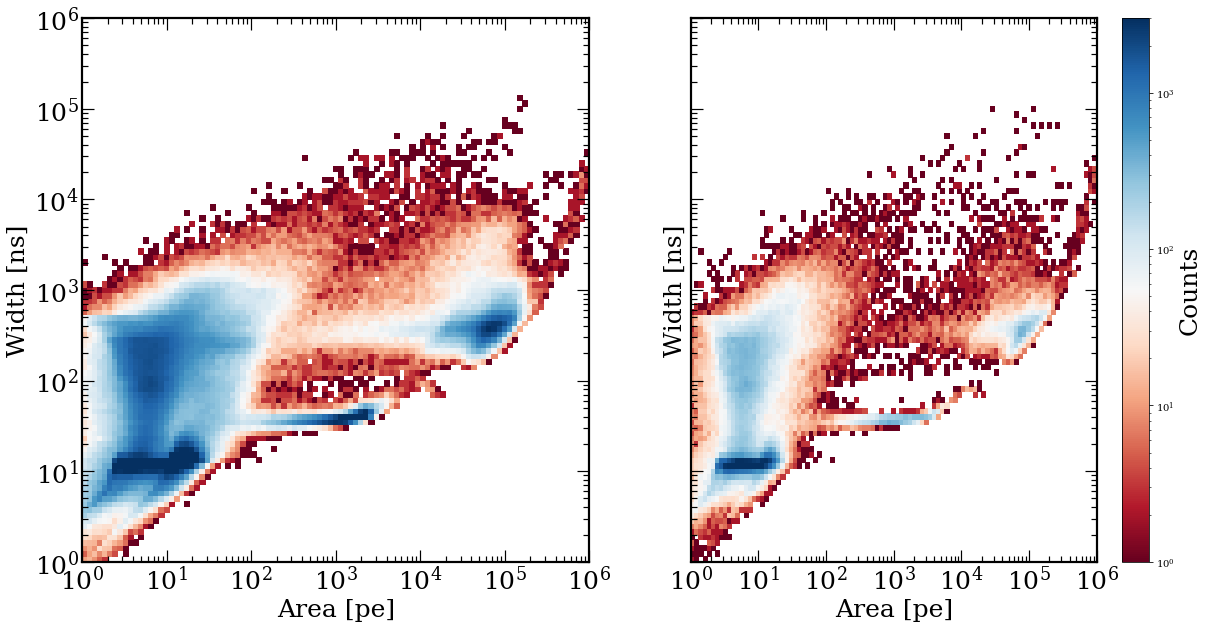

In [156]:
fig, (axes1,axes2) = plt.subplots(1,2,figsize=(20,10),sharex=True, sharey=True)


plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20




axes1.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes1.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes1.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.yaxis.set_minor_locator(AutoMinorLocator(5))
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

axes2.tick_params(axis='both')

for axis in ['top','bottom','left','right']:
    axes2.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes2.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.yaxis.set_minor_locator(AutoMinorLocator(5))
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


bins_x = np.logspace(0,6,100)
bins_y = np.logspace(0,6,100)
histo_max= 2*10**3



counts_cs, _, _ = np.histogram2d(integral_all_runs['00178'], width_all_runs['00178'], bins=(bins_x, bins_y))
counts_bk, _, _ = np.histogram2d(integral_all_runs['00175'], width_all_runs['00175'], bins=(bins_x, bins_y))

# counts_cs, _, _ = np.histogram2d(integral_all_runs['00178'], width_all_runs['00178'], bins=(bins_x, bins_y))
# counts_bk, _, _ = np.histogram2d(cut_integral_all_runs['00175'], cut_width_all_runs['00175'], bins=(bins_x, bins_y))


im = axes1.pcolormesh(bins_x, bins_y, counts_cs.T, norm=mpl.colors.LogNorm(), vmax=3e3, cmap = 'RdBu')
im = axes2.pcolormesh(bins_x, bins_y, counts_bk.T, norm=mpl.colors.LogNorm(), vmax=3e3, cmap = 'RdBu')
cb = plt.colorbar(im, ax=axes2, label='Counts')
axes1.set_xscale('log')
axes1.set_yscale('log')
axes1.set_xlabel('Area [pe]')
axes1.set_ylabel('Width [ns]')
axes2.set_xscale('log')
axes2.set_yscale('log')
axes2.set_xlabel('Area [pe]')
axes2.set_ylabel('Width [ns]')

plt.show()


## Is there a difference in the number of trash waveforms in between an S1 and an S2?

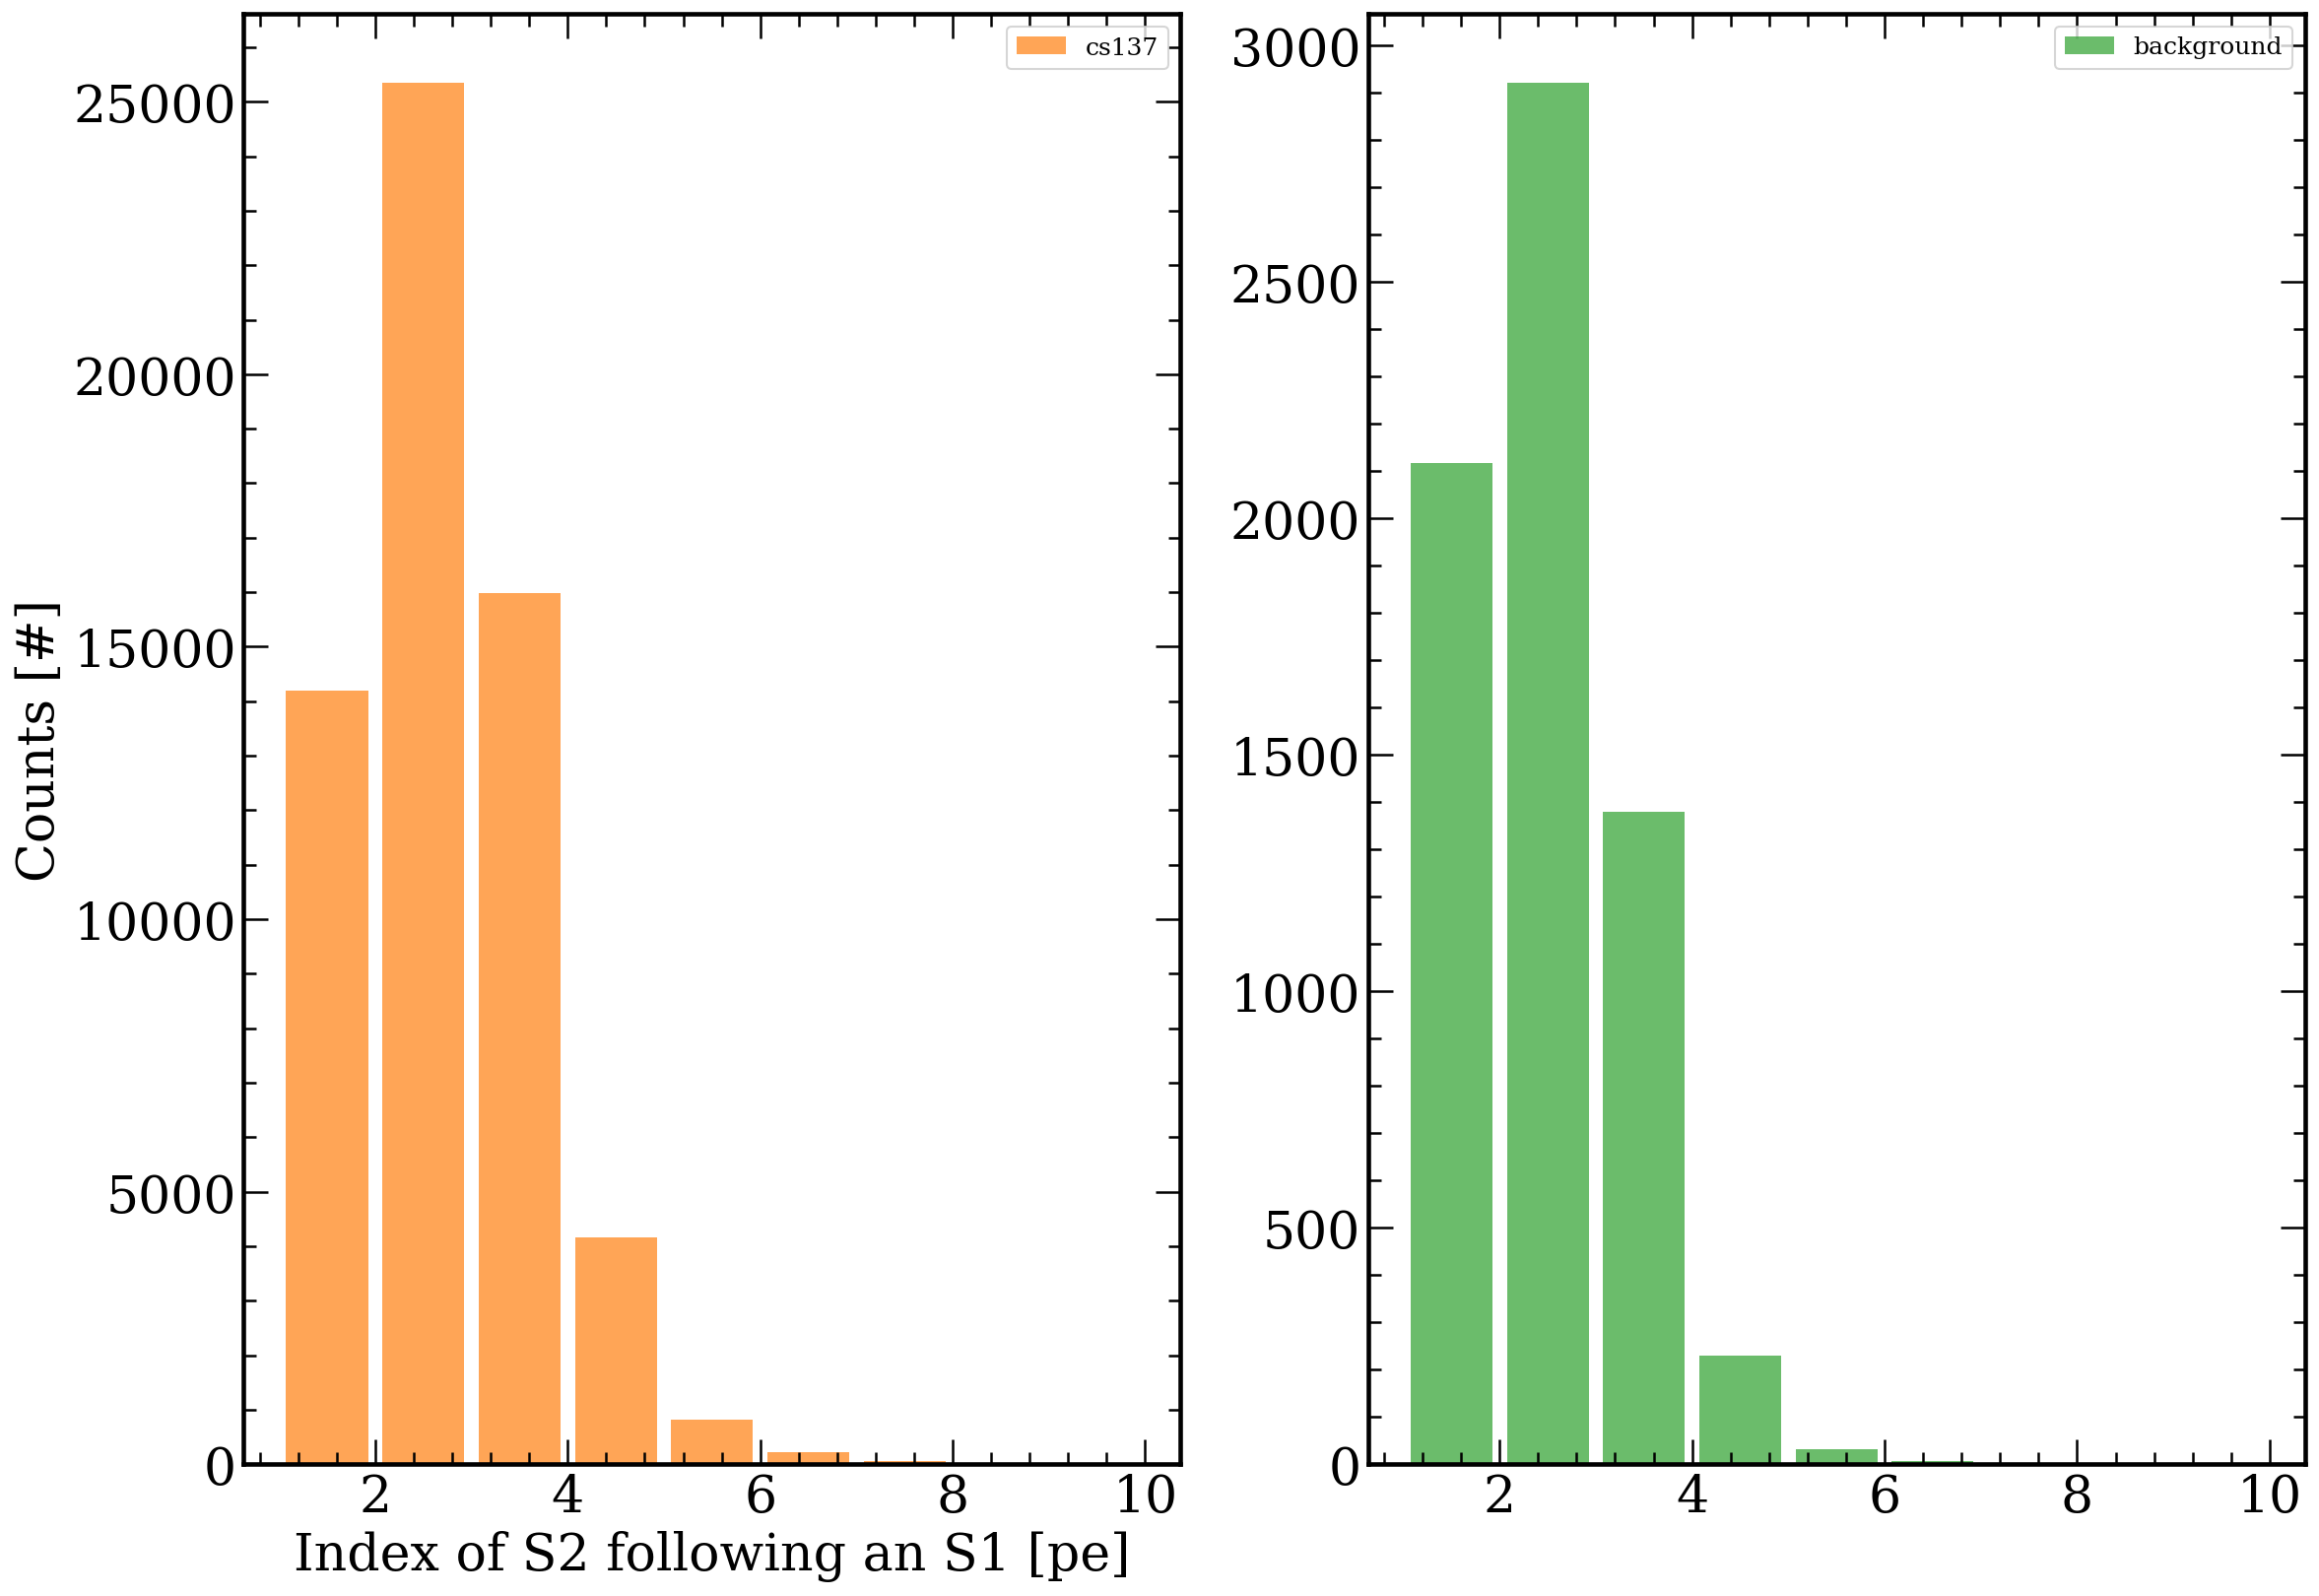

In [157]:
fig, (axes1, axes2)=plt.subplots(1,2,figsize=(18, 13), dpi=150, sharex = True)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters

axes1.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes1.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes1.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.yaxis.set_minor_locator(AutoMinorLocator(5))
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

axes2.tick_params(axis='both')

for axis in ['top','bottom','left','right']:
    axes2.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes2.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.yaxis.set_minor_locator(AutoMinorLocator(5))
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

counts_cs, binEdgesCs137 = np.histogram(cs_s2_index_all_runs['00178'], bins=np.linspace(1,10,11))
# bincenters_double_scatter = 0.5 * (binEdgesCs137[1:] + binEdgesCs137[:-1])

counts_bkg, binEdgesBackground = np.histogram(cs_s2_index_all_runs['00175'], bins=np.linspace(1,10,11))
# bincenters_no_scatter_cut = 0.5 * (binEdgesBackground[1:] + binEdgesBackground[:-1])

x_bins = np.linspace(1,10,10)
# print(x_bins)
# print(n)
#axes1.scatter(x_bins, counts_cs, c ='b', s=100, marker = 'x', label = 'cs137')
#axes2.scatter(x_bins, counts_bkg, c ='g', s=100, marker = 'x', label = 'background')
axes1.hist(cs_s2_index_all_runs['00178'], x_bins,rwidth=0.85, color='C1', alpha = 0.7, label= 'cs137')
axes2.hist(cs_s2_index_all_runs['00175'], x_bins,rwidth=0.85, color='C2', alpha = 0.7, label= 'background')
axes1.legend(loc = 1, prop={'size': 12})
axes2.legend(loc = 1,prop={'size': 12})
axes1.set_xlabel('Index of S2 following an S1 [pe]')
axes1.set_ylabel('Counts [#]')
# axes2.set_xlabel('Average S2 area [pe]')
# axes2.set_ylabel('Counts [#]')
plt.show()

In [158]:
print(len(cs_s1_area))
print(len(cs_s1_area_corrected))

63735
38938


## Apply a single scatter cut and plot the S1 region without/with double scatter cut applied

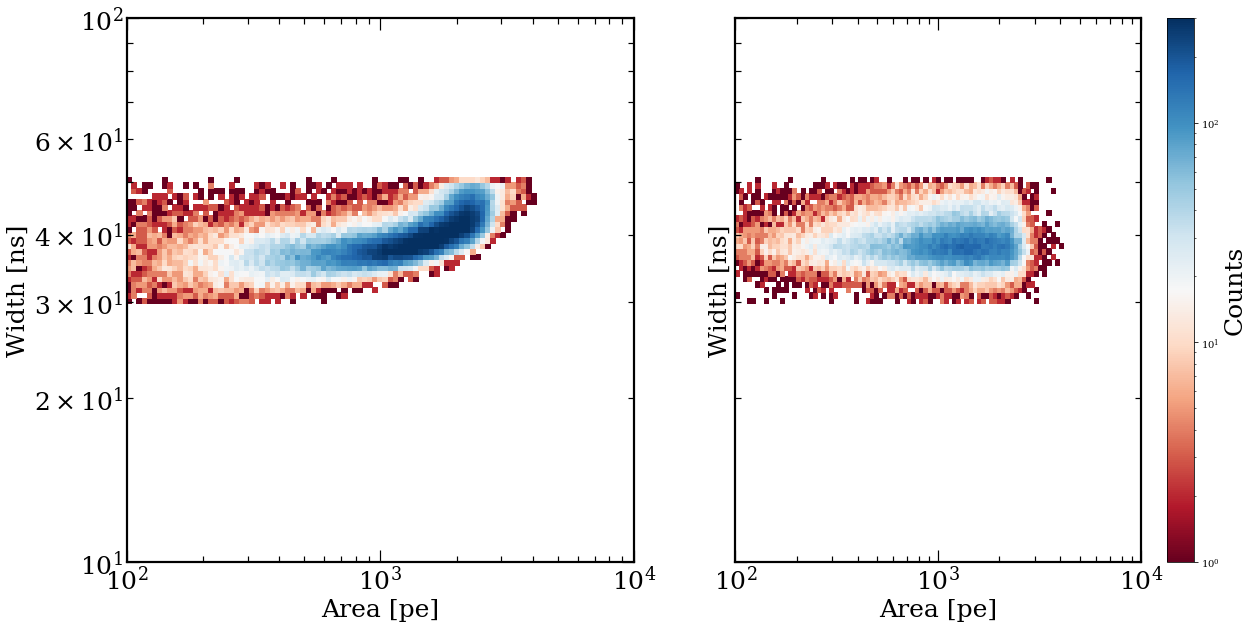

In [159]:
fig, (axes1,axes2) = plt.subplots(1,2,figsize=(20,10),sharex=True, sharey=True)


plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20




axes1.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes1.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes1.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.yaxis.set_minor_locator(AutoMinorLocator(5))
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

axes2.tick_params(axis='both')

for axis in ['top','bottom','left','right']:
    axes2.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes2.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.yaxis.set_minor_locator(AutoMinorLocator(5))
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


bins_x = np.logspace(2,4,100)
bins_y = np.logspace(1,2,100)
histo_max= 2*10**3



counts_cs, _, _ = np.histogram2d(cs_s1_area_all_runs['00178'], cs_s1_width_all_runs['00178'], bins=(bins_x, bins_y))
counts_cs_scatter_cut, _, _ = np.histogram2d(cs_s1_area_corrected_all_runs['00178'], cs_s1_width_corrected_all_runs['00178'], bins=(bins_x, bins_y))

# counts_cs, _, _ = np.histogram2d(integral_all_runs['00178'], width_all_runs['00178'], bins=(bins_x, bins_y))
# counts_bk, _, _ = np.histogram2d(cut_integral_all_runs['00175'], cut_width_all_runs['00175'], bins=(bins_x, bins_y))


im = axes1.pcolormesh(bins_x, bins_y, counts_cs.T, norm=mpl.colors.LogNorm(), vmax=3e2, cmap = 'RdBu')
im = axes2.pcolormesh(bins_x, bins_y, counts_cs_scatter_cut.T, norm=mpl.colors.LogNorm(), vmax=3e2, cmap = 'RdBu')
cb = plt.colorbar(im, ax=axes2, label='Counts')
axes1.set_xscale('log')
axes1.set_yscale('log')
axes1.set_xlabel('Area [pe]')
axes1.set_ylabel('Width [ns]')
axes2.set_xscale('log')
axes2.set_yscale('log')
axes2.set_xlabel('Area [pe]')
axes2.set_ylabel('Width [ns]')

plt.show()


## Project corrected S1s on x-axis: log scale and normed per bin

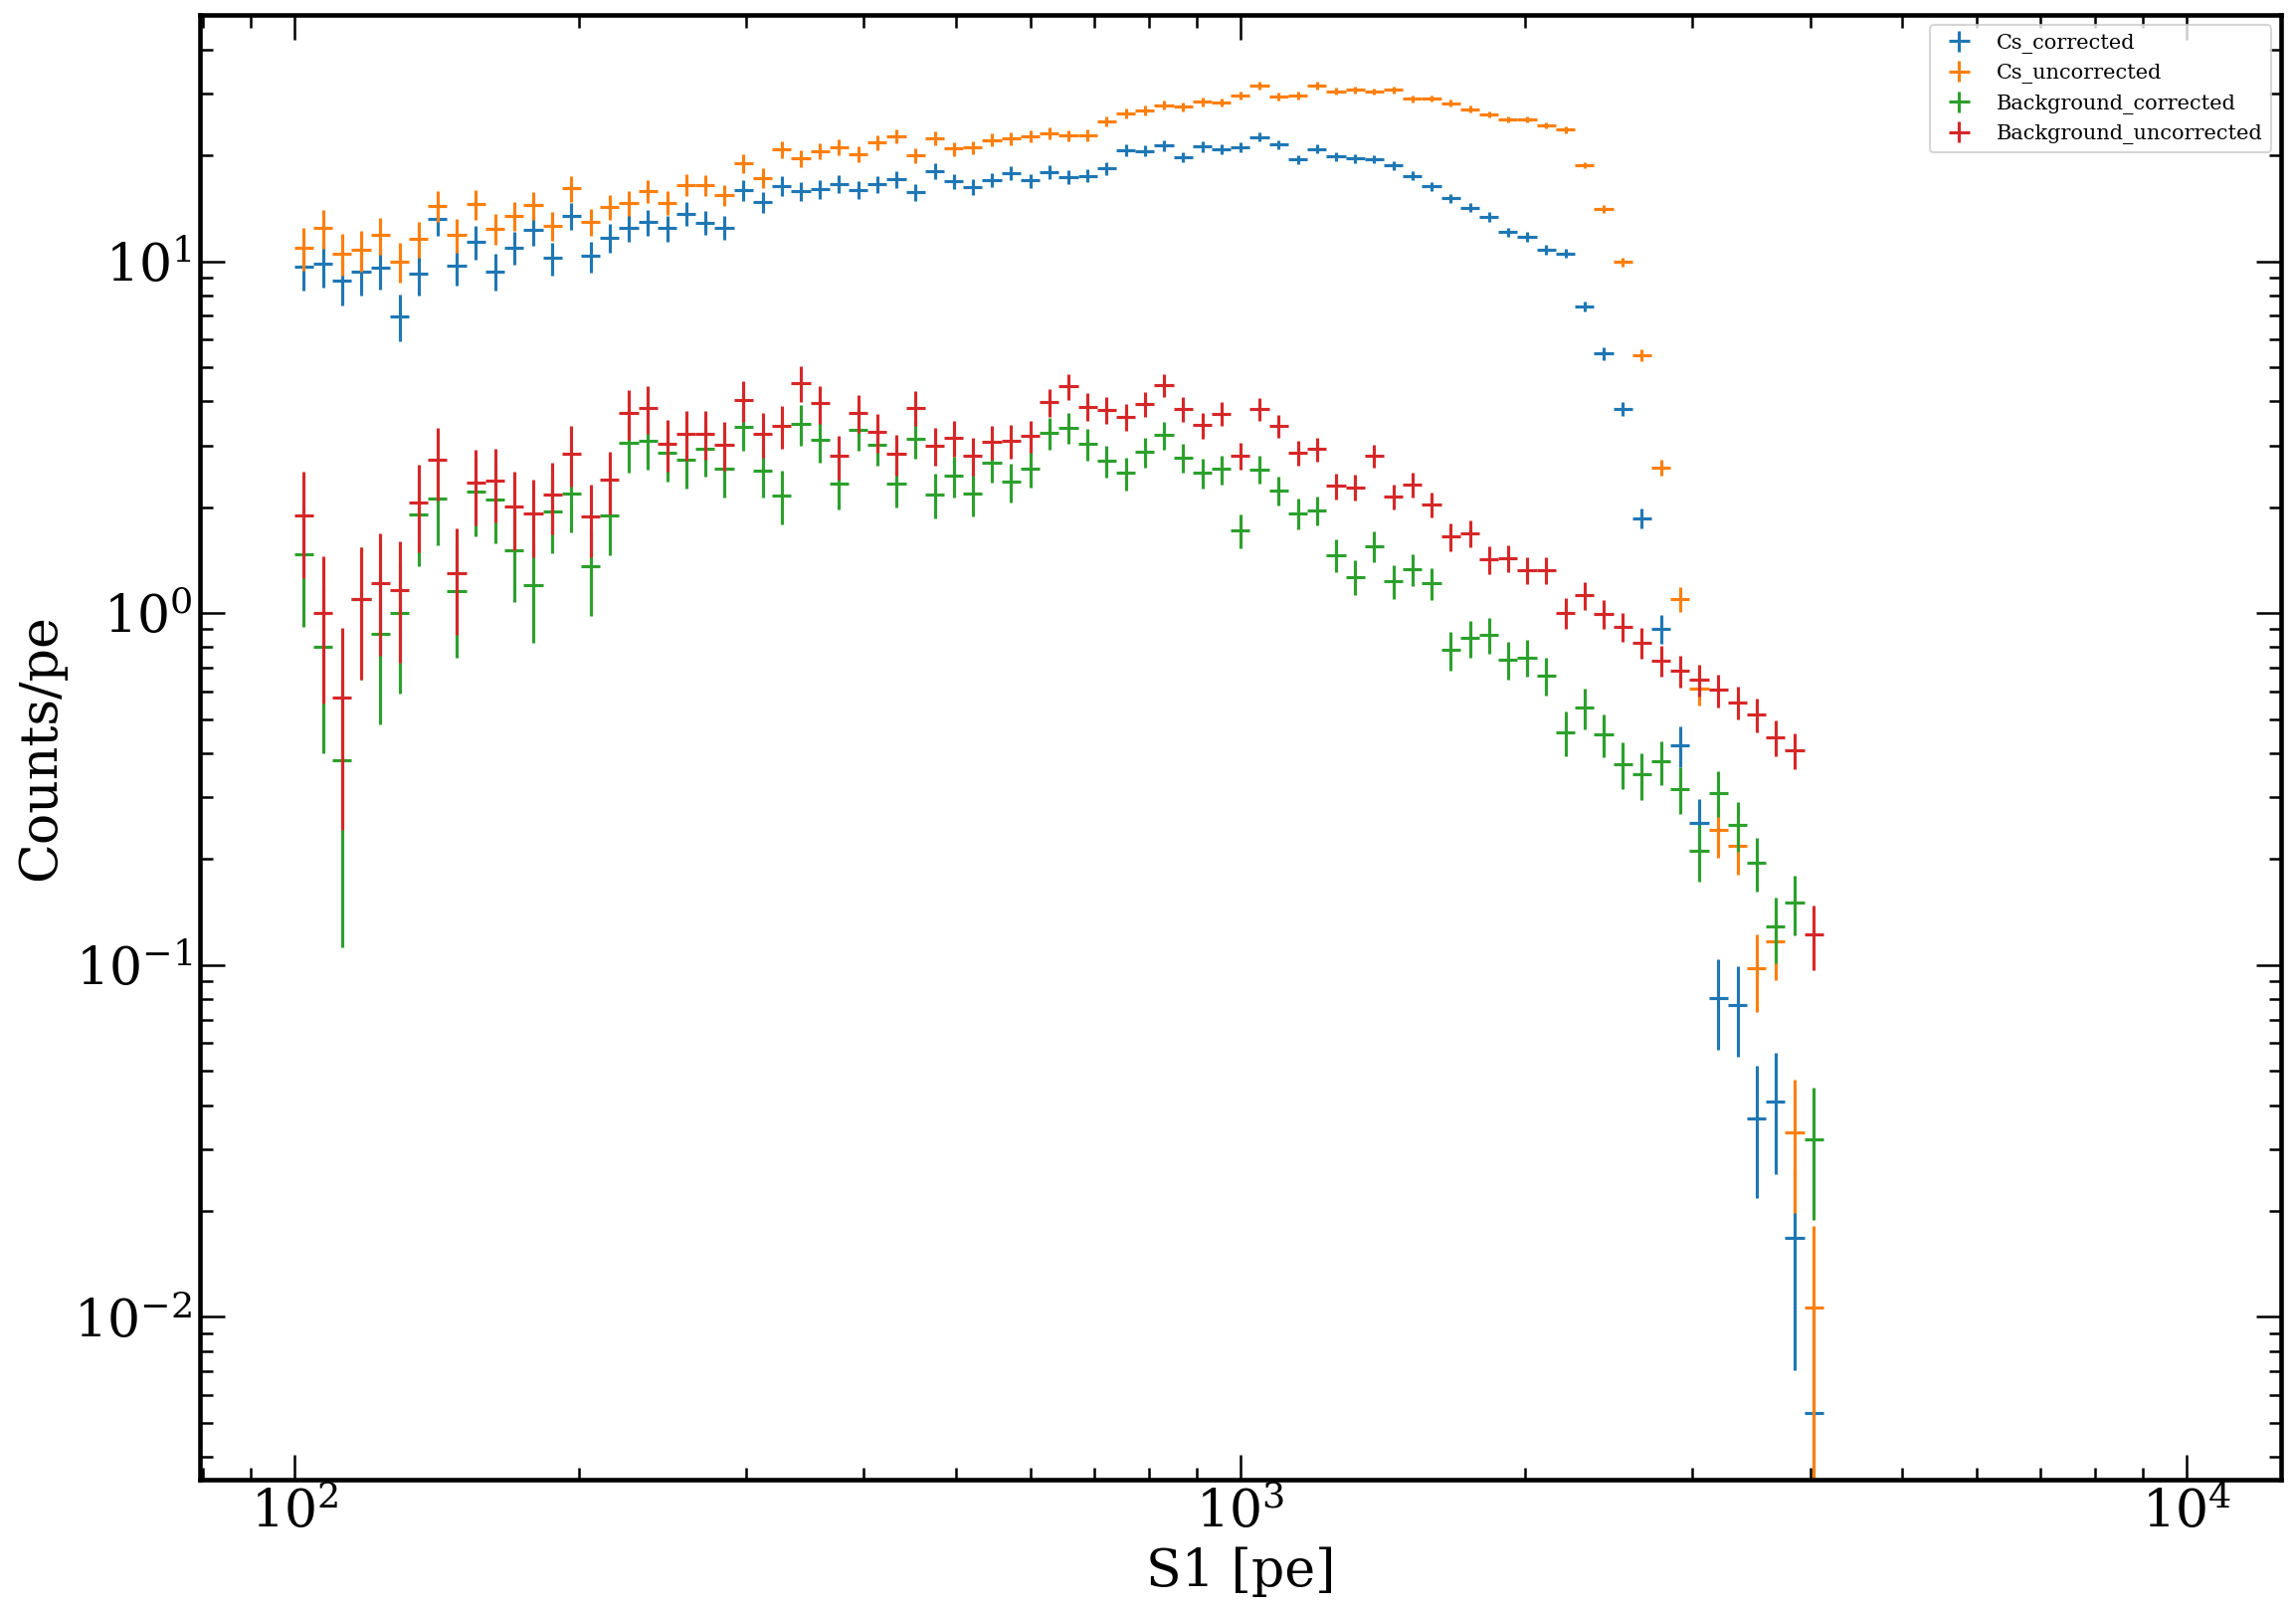

In [160]:



fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


bins = np.logspace(2,4,100)
bin_centers = 0.5*(bins[1:] + bins[:-1])
bin_fullwidths = (bins[1:] - bins[:-1])
# print(bins)
# print(bin_centers)
# print(bin_fullwidths)
cs_corrected, _ = np.histogram(cs_s1_area_corrected_all_runs['00178'], bins=bins)
plt.errorbar(bin_centers, cs_corrected/bin_fullwidths, xerr=0.5*bin_fullwidths, yerr=np.sqrt(cs_corrected)/bin_fullwidths, capsize=0, linestyle='', label='Cs_corrected')

cs_uncorrected, _ = np.histogram(cs_s1_area_all_runs['00178'], bins=bins)
plt.errorbar(bin_centers, cs_uncorrected/bin_fullwidths, xerr=0.5*bin_fullwidths, yerr=np.sqrt(cs_uncorrected)/bin_fullwidths, capsize=0, linestyle='', label='Cs_uncorrected')

background_corrected, _ = np.histogram(cs_s1_area_corrected_all_runs['00175'], bins=bins)
plt.errorbar(bin_centers, background_corrected/bin_fullwidths, xerr=0.5*bin_fullwidths, yerr=np.sqrt(background_corrected)/bin_fullwidths, capsize=0, linestyle='', label='Background_corrected')

background_uncorrected, _ = np.histogram(cs_s1_area_all_runs['00175'], bins=bins)
plt.errorbar(bin_centers, background_uncorrected/bin_fullwidths, xerr=0.5*bin_fullwidths, yerr=np.sqrt(background_uncorrected)/bin_fullwidths, capsize=0, linestyle='', label='Background_uncorrected')

plt.yscale('log')
plt.xscale('log')
plt.ylabel('Counts/pe')
plt.xlabel('S1 [pe]')
plt.legend()
plt.show()

## Linear projection

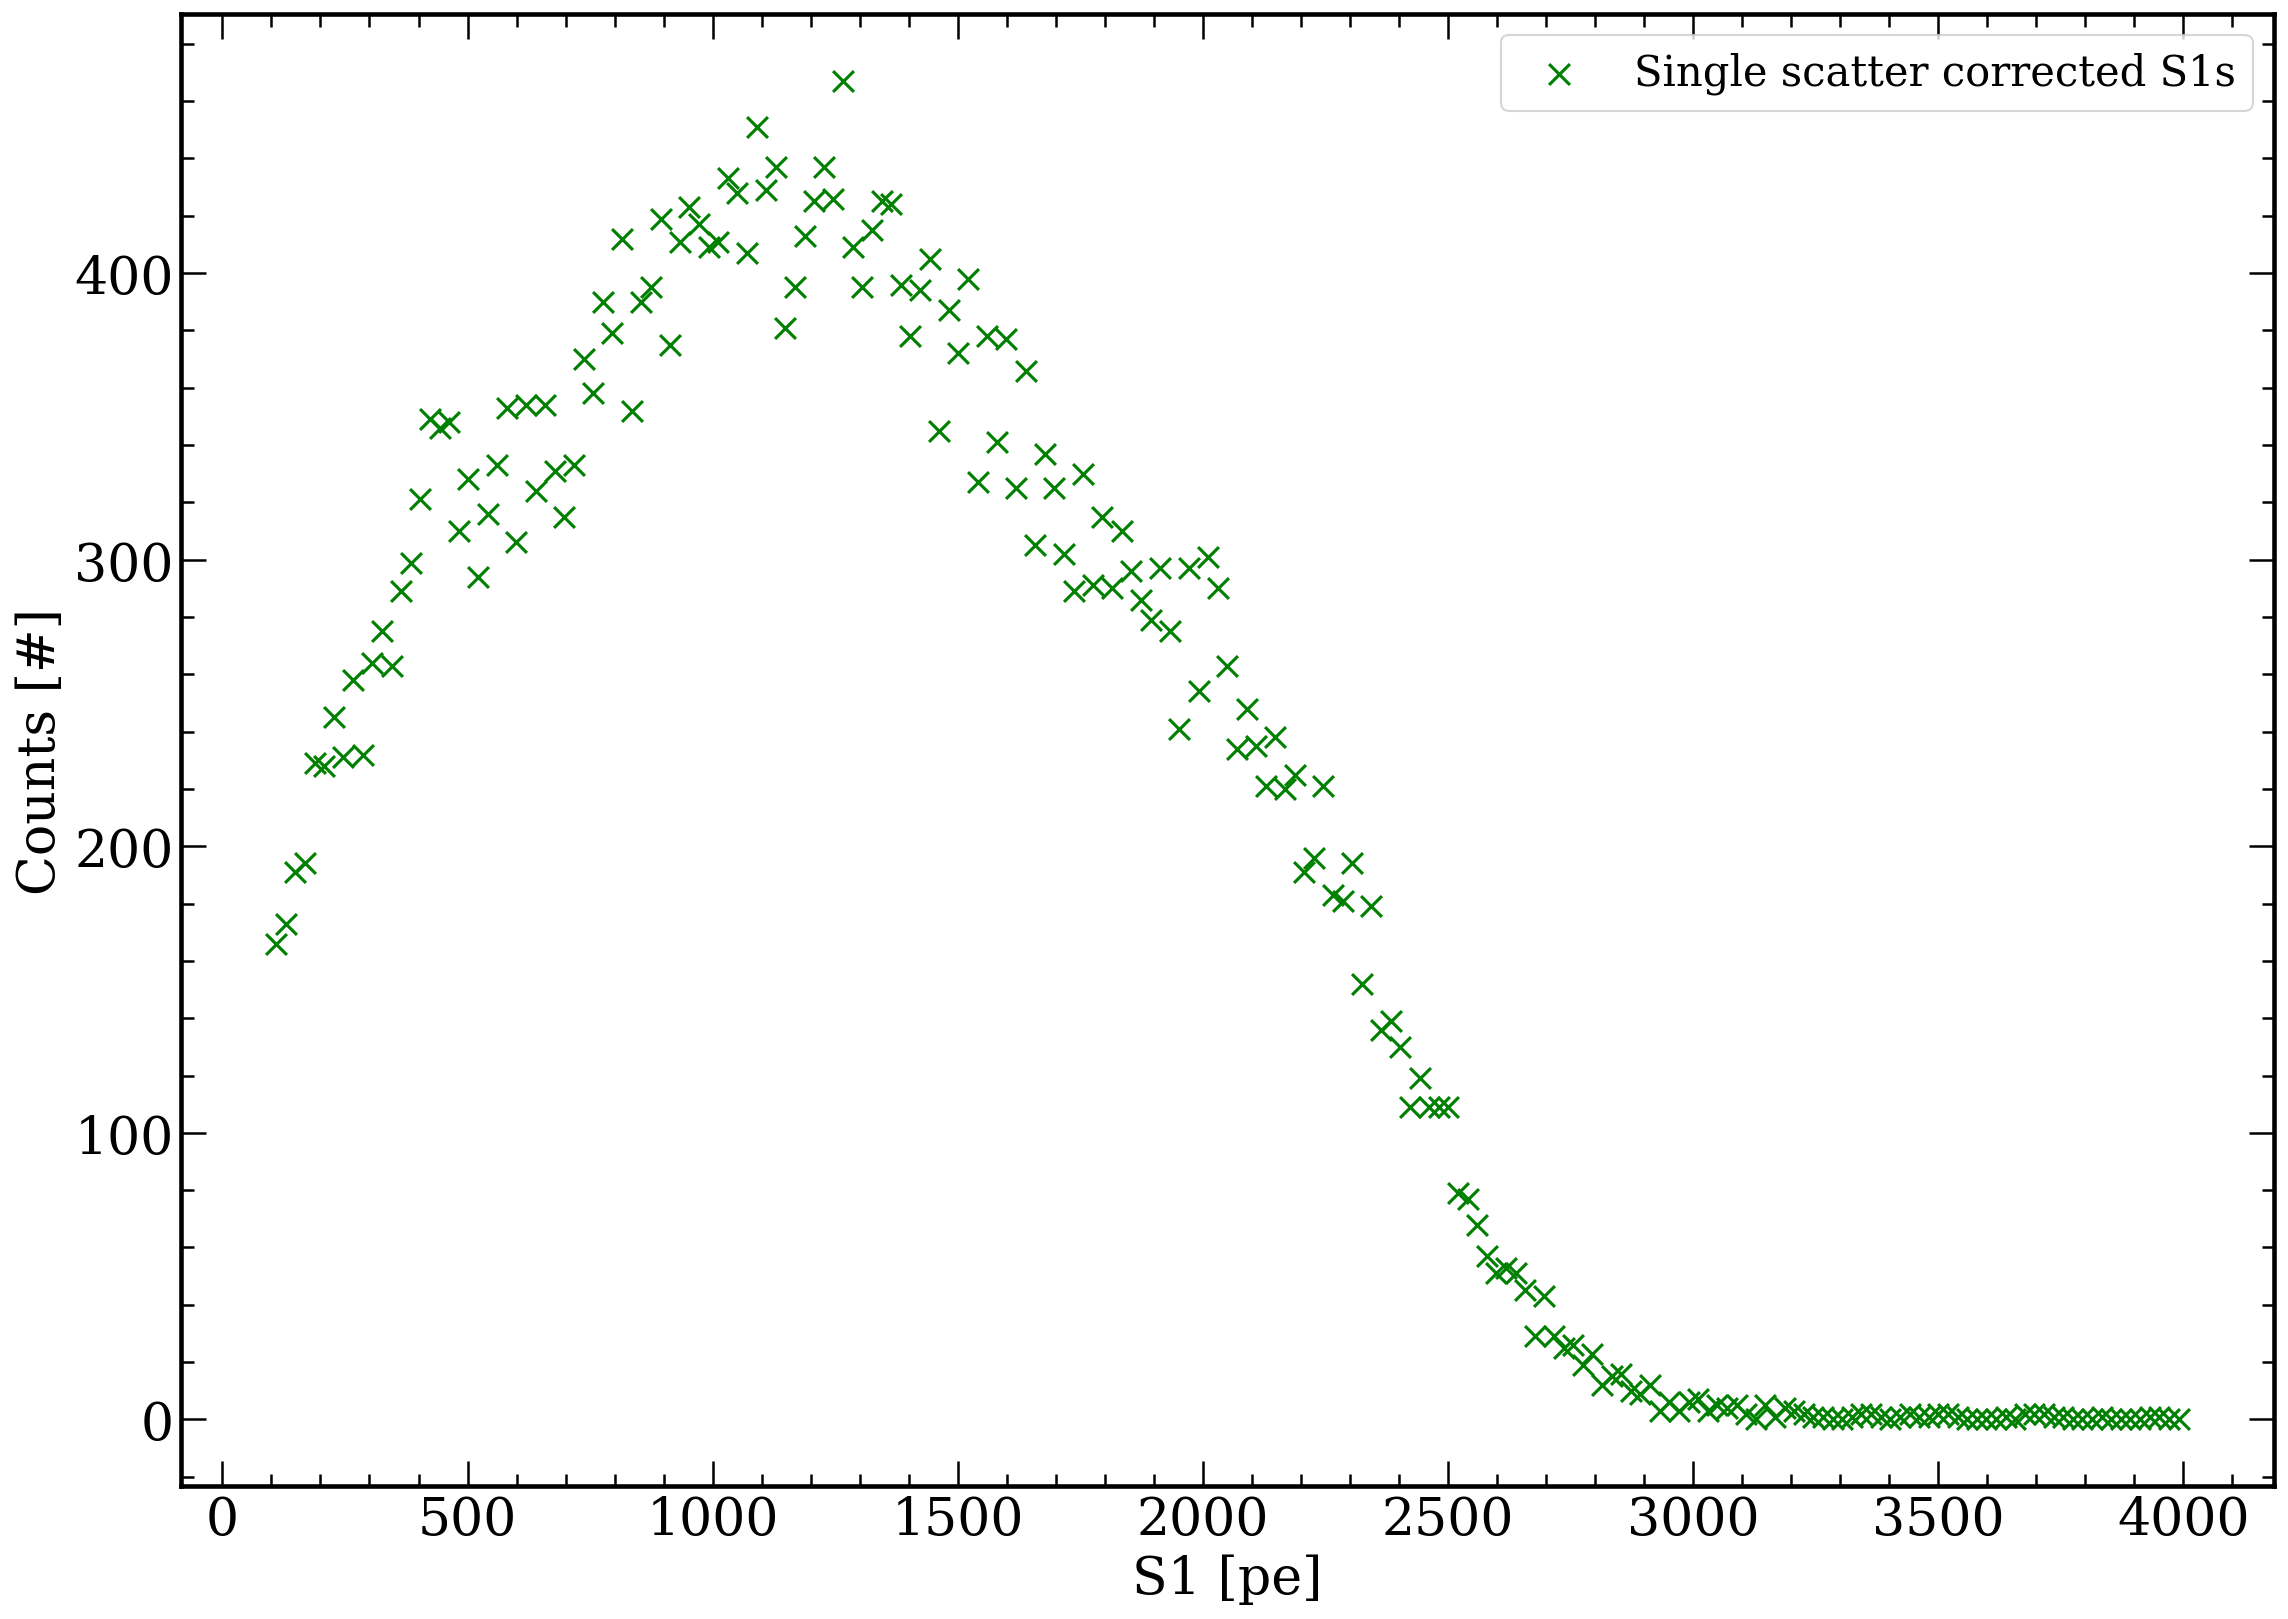

In [183]:
fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


Cs137_range = np.linspace(100, 4000,200)
Cs137_counts, Cs137_binEdges = np.histogram(cs_s1_area_corrected_all_runs['00177'], bins=Cs137_range)
Cs137_bincenters = 0.5 * (Cs137_binEdges[1:] + Cs137_binEdges[:-1])

axes.scatter(Cs137_bincenters, Cs137_counts , s=100,c = 'g', marker = 'x', label = 'Single scatter corrected S1s')
# axes.set_xscale('log')
# axes.set_yscale('log')
axes.set_xlabel('S1 [pe]')
axes.set_ylabel('Counts [#]')
axes.legend(prop={'size': 20})
plt.show()

## S2 vs S1 

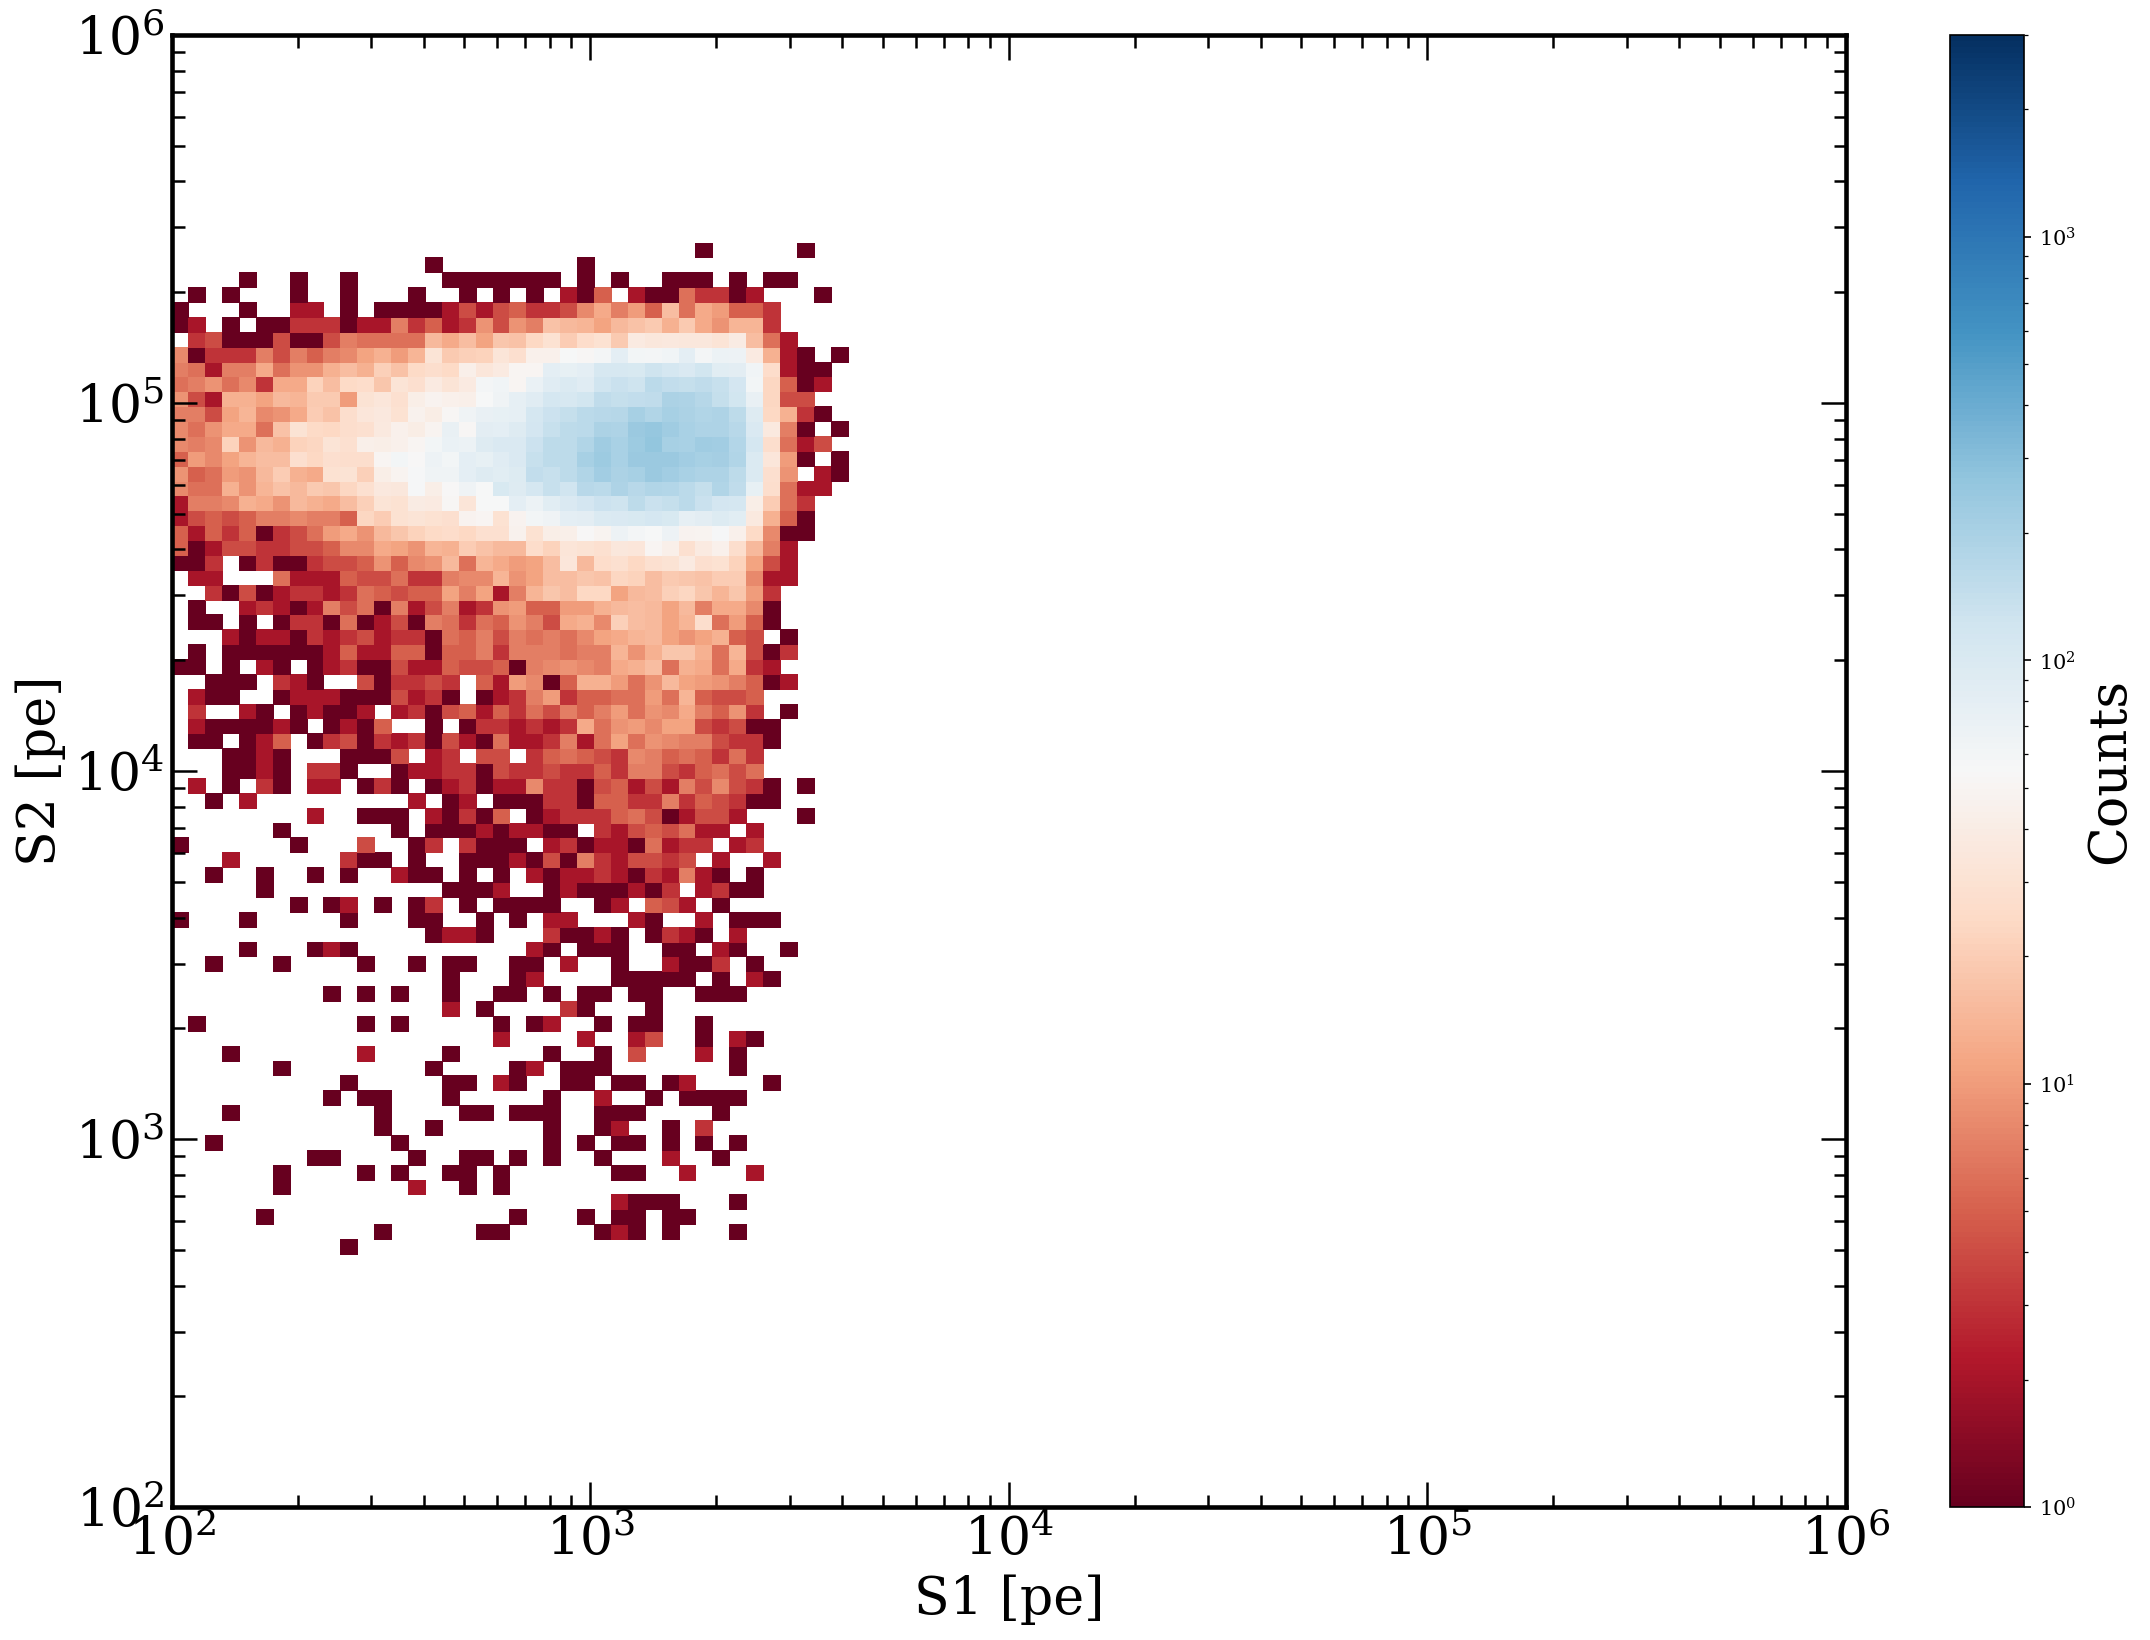

In [162]:



fig=plt.figure(figsize=(18, 13), dpi=150)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


bins_x = np.logspace(2,6,100)
bins_y = np.logspace(2,6,100)
histo_max= 2*10**3

S1_S2, _, _ = np.histogram2d(cs_s1_area_corrected_all_runs['00178'], cs_s2_area_corrected_all_runs['00178'], bins=(bins_x, bins_y))



im = axes.pcolormesh(bins_x, bins_y, S1_S2.T, norm=mpl.colors.LogNorm(), vmax=3e3, cmap = 'RdBu')

cb = plt.colorbar(im, ax=axes, label='Counts')
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('S1 [pe]')
axes.set_ylabel('S2 [pe]')


plt.show()

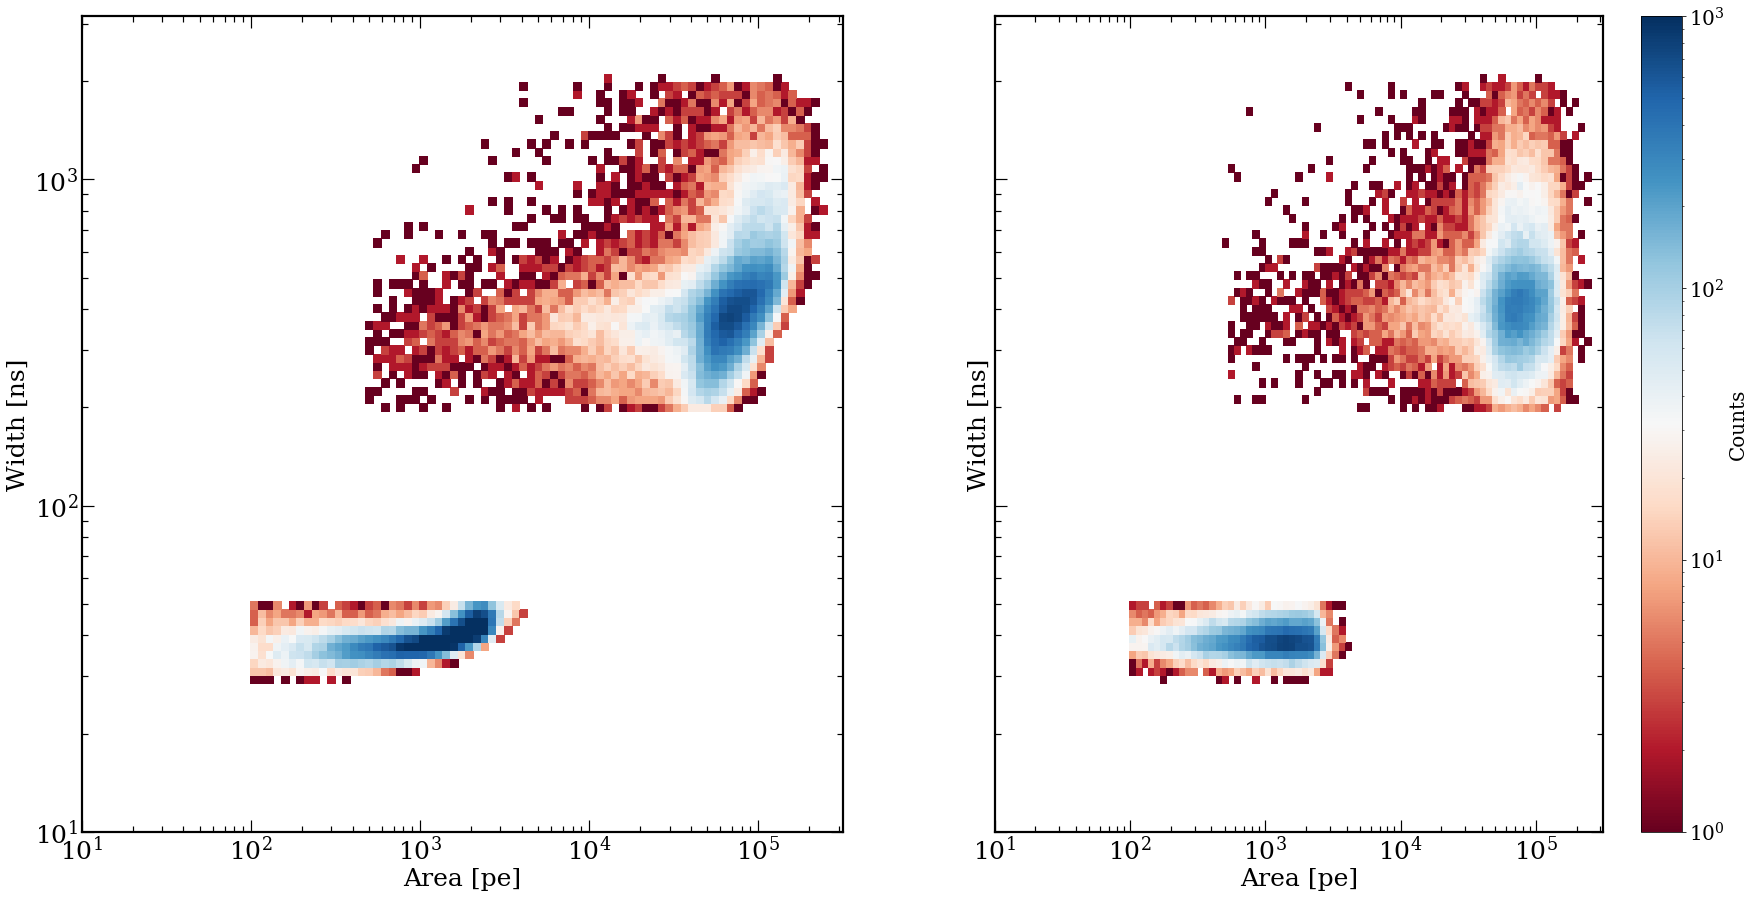

In [163]:
fig, (axes1,axes2) = plt.subplots(1,2,figsize=(30,15),sharex=True, sharey=True)


plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20




axes1.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes1.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes1.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.yaxis.set_minor_locator(AutoMinorLocator(5))
axes1.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes1.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

axes2.tick_params(axis='both')

for axis in ['top','bottom','left','right']:
    axes2.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes2.xaxis.set_minor_locator(AutoMinorLocator(5)) 
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.yaxis.set_minor_locator(AutoMinorLocator(5))
axes2.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes2.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

axes3.tick_params(axis='both') 

# Axes ---> Linewidth

bins_x = np.logspace(1,5.5,100)
bins_y = np.logspace(1,3.5,100)
histo_max= 2*10**3



counts_cs_S1, _, _ = np.histogram2d(cs_s1_area_all_runs['00178'], cs_s1_width_all_runs['00178'], bins=(bins_x, bins_y))
counts_cs_S1_scatter_cut, _, _ = np.histogram2d(cs_s1_area_corrected_all_runs['00178'], cs_s1_width_corrected_all_runs['00178'], bins=(bins_x, bins_y))

counts_cs_S2, _, _ = np.histogram2d(cs_s2_area_all_runs['00178'], cs_s2_width_all_runs['00178'], bins=(bins_x, bins_y))
counts_cs_S2_scatter_cut, _, _ = np.histogram2d(cs_s2_area_corrected_all_runs['00178'], cs_s2_width_corrected_all_runs['00178'], bins=(bins_x, bins_y))

# counts_cs, _, _ = np.histogram2d(integral_all_runs['00178'], width_all_runs['00178'], bins=(bins_x, bins_y))
# counts_bk, _, _ = np.histogram2d(cut_integral_all_runs['00175'], cut_width_all_runs['00175'], bins=(bins_x, bins_y))


im = axes1.pcolormesh(bins_x, bins_y, counts_cs_S1.T, norm=mpl.colors.LogNorm(), vmax=1e3, cmap = 'RdBu')
im = axes2.pcolormesh(bins_x, bins_y, counts_cs_S1_scatter_cut.T, norm=mpl.colors.LogNorm(), vmax=1e3, cmap = 'RdBu')
im = axes1.pcolormesh(bins_x, bins_y, counts_cs_S2.T, norm=mpl.colors.LogNorm(), vmax=1e3, cmap = 'RdBu')
im = axes2.pcolormesh(bins_x, bins_y, counts_cs_S2_scatter_cut.T, norm=mpl.colors.LogNorm(), vmax=1e3, cmap = 'RdBu')
cb = plt.colorbar(im, ax=axes2, label='Counts')
cb.set_label('Counts',size=20)
cb.ax.tick_params(labelsize=20) 
axes1.set_xscale('log')
axes1.set_yscale('log')
axes1.set_xlabel('Area [pe]')
axes1.set_ylabel('Width [ns]')
axes2.set_xscale('log')
axes2.set_yscale('log')
axes2.set_xlabel('Area [pe]')
axes2.set_ylabel('Width [ns]')


plt.show()


In [164]:
# def reconstructed_position(input_array):
#     ## Normalize sum input to 1 in order to correspond to area fraction in top array
#     HFs_input = input_array / np.sum(input_array)
#     ## Use model to reconstruct position
#     ## Important: Factor 70 for rescaling label
#     predictions = model_NN.predict(np.array([HFs_input]))[0]*70
#     return predictions

In [165]:
# predict_feature = np.array([0.02448657, 0.04107425, 0.06240126, 0.4399684 , 0.23933649,  0.04107425, 0.15165877])
# reconstructed_position(predict_feature)